
📌 Paso 1: Entendiendo el problema
Este proyecto busca predecir el precio de cierre de Bitcoin basándose en datos históricos.

📌 Paso 2: Carga y exploración de datos

🔍 Primeras filas del dataset:
      Open     High      Low    Volume    Close
0  6520.48  6520.48  6520.14  0.092154  6520.14
1   627.00   627.00   625.99  1.604823   627.00
2   352.01   352.01   352.00  0.702997   352.00
3   691.00   697.73   690.00  3.894570   690.78
4  5732.11  5732.11  5732.11  0.083204  5732.11

📊 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1000 non-null   float64
 1   High    1000 non-null   float64
 2   Low     1000 non-null   float64
 3   Volume  1000 non-null   float64
 4   Close   1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None


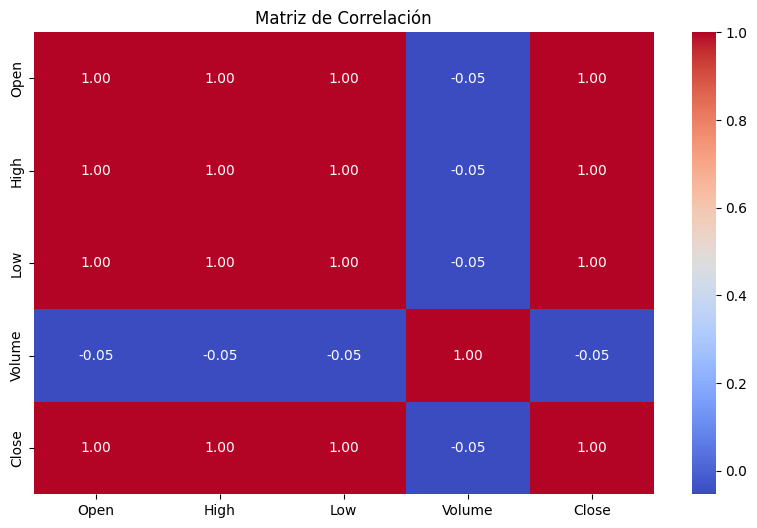


📌 Paso 3: Preprocesamiento de datos
✅ Datos preprocesados correctamente.

📌 Paso 4: Entrenamiento del modelo
✅ Modelo entrenado con éxito.

📌 Paso 5: Evaluación del modelo
📉 MAE: 35.98
📉 MSE: 10835.87
📈 R²: 1.00

📌 Paso 6: Guardado del modelo
✅ Modelo guardado en: ../models/bitcoin_model.joblib


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# **Paso 1: Entendiendo el problema**
print("\n📌 Paso 1: Entendiendo el problema")
print("Este proyecto busca predecir el precio de cierre de Bitcoin basándose en datos históricos.")

# **Paso 2: Carga y exploración de datos**
print("\n📌 Paso 2: Carga y exploración de datos")
file_path = "../data_sample/bitcoin_sample.csv"
df = pd.read_csv(file_path)

print("\n🔍 Primeras filas del dataset:")
print(df.head())
print("\n📊 Información del dataset:")
print(df.info())

# **Visualización de la correlación**
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# **Paso 3: Preprocesamiento de datos**
print("\n📌 Paso 3: Preprocesamiento de datos")
df = df[["Open", "High", "Low", "Volume", "Close"]]
X = df.drop(columns=["Close"])
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Datos preprocesados correctamente.")

# **Paso 4: Entrenamiento del modelo**
print("\n📌 Paso 4: Entrenamiento del modelo")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("✅ Modelo entrenado con éxito.")

# **Paso 5: Evaluación del modelo**
print("\n📌 Paso 5: Evaluación del modelo")
y_pred = rf_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📈 R²: {r2:.2f}")

# **Paso 6: Guardado del modelo**
print("\n📌 Paso 6: Guardado del modelo")
model_path = "../models/bitcoin_model.joblib"
joblib.dump(rf_model, model_path)
print(f"✅ Modelo guardado en: {model_path}")


In [3]:
import pandas as pd

# 📌 Cargar los datos de prueba
test_file = "C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/data_sample/bitcoin_sample.csv"

# Cargar el dataset de prueba
df_test = pd.read_csv(test_file)

# Verificar nombres de las columnas
print("🔍 Columnas en el dataset:", df_test.columns)

# Extraer características y variable objetivo
if "Close" in df_test.columns:
    X_test = df_test.drop(columns=["Close"])  # Características
    y_test = df_test["Close"]  # Variable objetivo
    print("✅ Datos de prueba cargados correctamente.")
else:
    print("❌ La columna 'Close' no está en el dataset. Verifica los nombres de las columnas.")


🔍 Columnas en el dataset: Index(['Open', 'High', 'Low', 'Volume', 'Close'], dtype='object')
✅ Datos de prueba cargados correctamente.


In [4]:
import joblib

# 📌 Cargar el modelo entrenado
model_path = "C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/models/bitcoin_pipeline.pkl"

try:
    pipeline = joblib.load(model_path)
    print("✅ Modelo cargado correctamente.")
except FileNotFoundError:
    print(f"❌ No se encontró el modelo en: {model_path}. Asegúrate de haberlo entrenado y guardado.")

# 📌 Realizar predicciones si el modelo está disponible
if 'pipeline' in locals():
    y_pred = pipeline.predict(X_test)
    print("✅ Predicciones generadas correctamente.")
else:
    print("❌ No se pudo generar `y_pred` porque el modelo no está disponible.")


❌ No se encontró el modelo en: C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/models/bitcoin_pipeline.pkl. Asegúrate de haberlo entrenado y guardado.
❌ No se pudo generar `y_pred` porque el modelo no está disponible.


In [6]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# 📌 Cargar el dataset
file_path = "C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/data_sample/bitcoin_sample.csv"

df = pd.read_csv(file_path)

# 📌 Verificar que la columna 'Close' existe
if "Close" not in df.columns:
    print("❌ Error: La columna 'Close' no está en el dataset.")
else:
    print("✅ Dataset cargado correctamente.")

# 📌 Separar características (X) y variable objetivo (y)
X = df.drop(columns=["Close"])  # Características
y = df["Close"]  # Variable objetivo

# 📌 Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 📌 Crear un pipeline de preprocesamiento y modelo
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Normalización
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# 📌 Entrenar el modelo
print("⏳ Entrenando el modelo...")
pipeline.fit(X_train, y_train)
print("✅ Entrenamiento completado.")

# 📌 Guardar el modelo entrenado
model_path = "C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/models/bitcoin_pipeline.pkl"

joblib.dump(pipeline, model_path)
print(f"✅ Modelo guardado en: {model_path}")


✅ Dataset cargado correctamente.
⏳ Entrenando el modelo...
✅ Entrenamiento completado.
✅ Modelo guardado en: C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/models/bitcoin_pipeline.pkl


✅ Modelo cargado correctamente.
✅ Predicciones generadas correctamente.


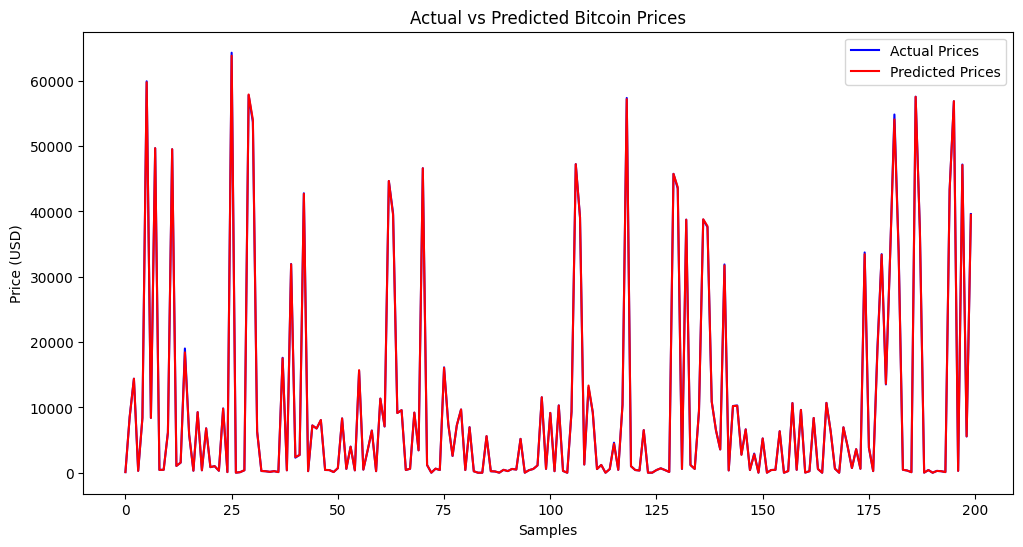

In [7]:
import joblib
import matplotlib.pyplot as plt

# 📌 Cargar el modelo entrenado
model_path = "C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/Project_Break_II_ML_DL/ML_Bitcoin/src/models/bitcoin_pipeline.pkl"

try:
    pipeline = joblib.load(model_path)
    print("✅ Modelo cargado correctamente.")
except FileNotFoundError:
    print(f"❌ No se encontró el modelo en: {model_path}. Asegúrate de haberlo entrenado y guardado.")

# 📌 Generar predicciones si el modelo está disponible
if 'pipeline' in locals():
    y_pred = pipeline.predict(X_test)
    print("✅ Predicciones generadas correctamente.")

    # 📊 Comparación entre precios reales y predichos
    plt.figure(figsize=(12,6))
    plt.plot(y_test.values, label="Actual Prices", color="blue")
    plt.plot(y_pred, label="Predicted Prices", color="red")
    plt.xlabel("Samples")
    plt.ylabel("Price (USD)")
    plt.title("Actual vs Predicted Bitcoin Prices")
    plt.legend()
    plt.show()
else:
    print("❌ No se puede generar `y_pred` porque el modelo no está disponible.")
